In [240]:
import pandas as pd
import altair as alt
df = pd.read_excel('residentes.xlsx')
residentes = df.MEMBRO1.unique()
patrocinador = df.PATROCINADOR.unique()

df.head()

,FASE,PATROCINADOR,TEMA,DESCRICAO,MEMBRO1,MEMBRO2,MEMBRO3,MEMBRO4
0,FASE 2,ACESSO DIGITAL,OCR de CNH,NaN,Jéssica,Rafael,Gabriel,NaN
1,FASE 2,BOSCH,Tool Manager,NaN,Felipe,Harrison,Leonardo,NaN
2,FASE 2,BOTICÁRIO,Análise de tendência,NaN,Alessandra,Gabriela,Andre,NaN
3,FASE 2,COCAMAR,Auditor Digital,NaN,Lázaro,Bruna,Sávio,NaN
4,FASE 2,FARMGO,Identificar áreas produtivas,NaN,Letícia,Wana,Cristiano,NaN


In [241]:
df_residentes = pd.DataFrame(columns=residentes, index = residentes)
df_residentes.reset_index(inplace=True)

for residente in residentes:
    
    df_lista = pd.DataFrame()
    
    df1 = df.loc[df.MEMBRO1 == residente]
    df2 = df.loc[df.MEMBRO2 == residente]
    df3 = df.loc[df.MEMBRO3 == residente]
    df4 = df.loc[df.MEMBRO4 == residente]
    lista1 = df1.MEMBRO2
    lista1 = lista1.append(df1.MEMBRO3)
    lista1 = lista1.append(df1.MEMBRO4)
    lista1 = lista1.dropna()
    lista2 = df2.MEMBRO1
    lista2 = lista2.append(df2.MEMBRO3)
    lista2 = lista2.append(df2.MEMBRO4)
    lista2 = lista2.dropna()
    lista2 = lista1.append(lista2)
    lista3 = df3.MEMBRO1
    lista3 = lista3.append(df3.MEMBRO2)
    lista3 = lista3.append(df3.MEMBRO4)
    lista3 = lista3.dropna()
    lista3 = lista2.append(lista3)
    lista4 = df4.MEMBRO1
    lista4 = lista4.append(df4.MEMBRO2)
    lista4 = lista4.append(df4.MEMBRO3)
    lista4 = lista4.dropna()
    lista4 = lista3.append(lista4)
    
    df_lista = pd.DataFrame(lista4, columns=['residentes'])
    df_lista['num'] = 1
    df_lista = df_lista.groupby('residentes')['num'].count()
    df_lista = df_lista.reset_index()
    cols = df_lista.residentes.unique()
    
    for col in cols:
    
        valor = df_lista.loc[df_lista.residentes == col]
        df_residentes[residente].loc[df_residentes['index'] == col] = float(valor['num'].unique())
        
df_residentes.fillna(0, inplace=True)
#df_residentes.set_index(df_residentes['index'],drop=False, inplace=True)

In [242]:
#df_residentes.drop('index', axis=1, inplace=True)

In [243]:
df_residentes

,index,Jéssica,Felipe,Alessandra,Lázaro,Letícia,Duan,Daniel,Lucas,Gabriela,...,Rafael,Vitor,Wana,Harrison,Sávio,Leonardo,Cristiano,Gabriel,Alexandre,André
0,Jéssica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
1,Felipe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0
2,Alessandra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0
3,Lázaro,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
4,Letícia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
5,Duan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0
6,Daniel,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
7,Lucas,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8,Gabriela,0.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
9,Bruna,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0


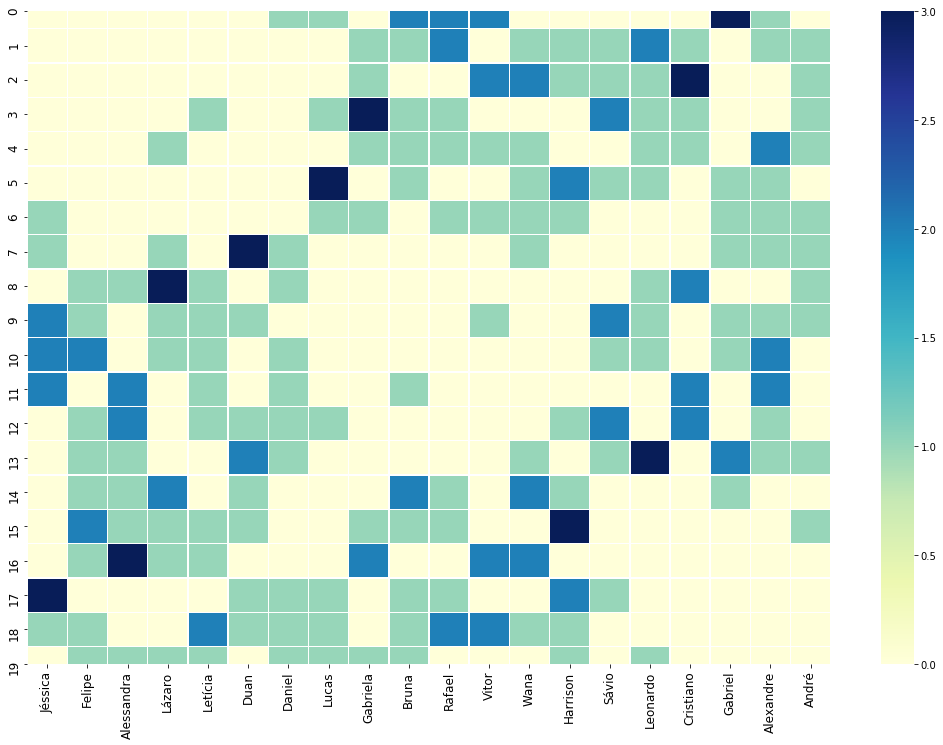

In [244]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


plt.figure(figsize=(18,12))

plt.xticks(range(df_residentes.shape[1]), df_residentes.drop('index', axis=1).columns, fontsize=12, rotation=90)
plt.yticks(range(df_residentes.shape[1]), df_residentes.drop('index', axis=1).columns, fontsize=12)
ax = sns.heatmap(df_residentes.drop('index', axis=1), linewidth=0.5, cmap="YlGnBu")
plt.show()

In [245]:
#df_residentes.reset_index(inplace=True)
ids = [i+1 for i in range(20)]
print(ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [246]:
df_residentes['ids'] = ids

In [247]:
df_residentes

,index,Jéssica,Felipe,Alessandra,Lázaro,Letícia,Duan,Daniel,Lucas,Gabriela,...,Vitor,Wana,Harrison,Sávio,Leonardo,Cristiano,Gabriel,Alexandre,André,ids
0,Jéssica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1
1,Felipe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,2
2,Alessandra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,3
3,Lázaro,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,4
4,Letícia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,5
5,Duan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,6
6,Daniel,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,7
7,Lucas,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8
8,Gabriela,0.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,9
9,Bruna,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,10


In [257]:
chart = (alt.Chart(df_residentes).mark_area(opacity=0.3).encode(x='index',y=alt.Y('Sávio',stack=None),color='Label:N').properties(
width=800,
height=300))
(chart)

alt.Chart(...)